In Week 5, we explore statistical learning through a series of videos and comprehension checks followed by a two-part case study that allows you to practice your coding skills with homeworks. We will use the scikit-learn library, one of the most widely used Python libraries for machine learning.

In Week 5, you will:

Learn the basics of linear and logistic regression
Learn how to use scikit-learn to fit linear and logistic regression models
Learn the basics of random forest methods for regression and classification
Learn how to use scikit-learn to fit a random forest model
Apply the techniques learned to analyze a dataset of movies
Week 5 is divided into three parts followed by the case study. Part 1 covers linear regression, Part 2 covers logistic regression, and Part 3 covers random forest methods for regression and classification. Comprehension Checks follow each video. The week concludes with a two-part case study looking at a movie dataset with two Homeworks that will allow you to practice the coding techniques introduced in the videos.

The Homeworks and some of the Comprehension Checks will require you to work through code. We encourage you to use Python to interactively test out your answers and further your learning.

# 5.1.1: Introduction to Statistical Learning

Statistical learning can be divided into two categories which
are called supervised learning and unsupervised learning.

Supervised learning refers to a collection of techniques and algorithms
that, when given a set of example inputs and example outputs,
learn to associate the inputs with the outputs.
The outputs usually need to be provided by a supervisor, which
could be a human or another algorithm, and this is where the name comes from.

Unsupervised learning refers to a collection of techniques and algorithms
that are given inputs only and there are no outputs.
The goal of supervised learning is to learn relationships and structure
from such data.

In statistics, variables can be either quantitative or qualitative.
Quantitative variables take on numerical values, such as income,
whereas qualitative variables take on values in a given category,
such as male or female.

In some cases, we convert a continuous variable to a categorical variable
by specifying the cutoff points between the categories.

Methods in supervised learning are divided into two groups
based on whether the output variable, also called the outcome,
is quantitative or qualitative.

If the outcome is quantitative, we talk about regression problems,
whereas if the outcome is qualitative, we talk about classification problems.

What the best prediction is depends on the so-called loss function,
which is a way of quantifying how far our predictions for Y for a given
value of X are from the true observed values of Y

First, in a regression setting, by far the most common loss function
is the so-called squared error loss.

Second, in a classification setting, we most often
use the so-called 0-1 loss function, and in that case,
the best classification for a given X is obtained
by classifying observation of the class with the highest
conditional probability given X.

Least squares loss is used to estimate the expected value of outputs, whereas  loss is used to estimate the probability of outputs. 

# 5.1.2: Generating Example Regression Data

In [68]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt 

Text(0, 0.5, 'y')

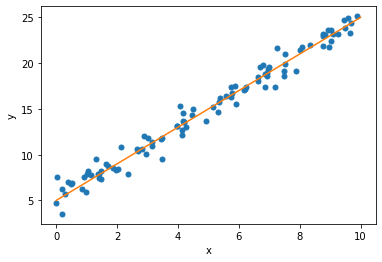

In [48]:
n = 100 # generate 100 data points
beta_0 = 5 
beta_1 = 2 

np.random.seed(1)

# ss.uniform.rvs(size=n) # generates random variables that are distributed on the 0-1 interval. In this case 100.

x = 10*ss.uniform.rvs(size=n)# will multiply by 10

# ss.norm.rvs(loc=0, scale=1, size=n) # random noise, the mean is going to be 0, scale is going to be 1

y = beta_0 + beta_1 *x + ss.norm.rvs(loc=0, scale=1, size=n)


plt.figure()
plt.plot(x, y, "o", ms=5); # circles for plot and marker size = 5

xx = np.array([0,10]) # jsut an x range

plt.plot(xx, beta_0 + beta_1 *xx)
plt.xlabel('x')
plt.ylabel('y')

In [49]:
np.mean(x)

4.8587792760014565

In [50]:
np.mean(y)

14.80142786070299

# 5.1.3: Simple Linear Regression

In simple linear regression, the goal
is to predict a quantitative response Y on the basis of a single predictor
variable X. It assumes the following relationship between the random
variables X and Y.

In [51]:
def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))

def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x

rss = compute_rss(estimate_y(x, beta_0, beta_1), y)
rss

81.540007425512

# 5.1.4: Least Squares Estimation in Code

In [52]:
rss = []
slopes = np.arange(-10, 15, 0.01)

# np.sum(y - beta_0 - slope * x) gives rss for a given slope

for slope in slopes:
    rss.append(np.sum(y - beta_0 - slope * x)**2)

In [53]:
rss

[34093010.84694827,
 34036294.38766557,
 33979625.143854976,
 33923003.11551647,
 33866428.30265007,
 33809900.705255784,
 33753420.3233336,
 33696987.15688354,
 33640601.205905564,
 33584262.4703997,
 33527970.950365946,
 33471726.645804297,
 33415529.556714747,
 33359379.683097303,
 33303277.024951965,
 33247221.58227875,
 33191213.355077602,
 33135252.343348593,
 33079338.547091696,
 33023471.9663069,
 32967652.60099418,
 32911880.451153595,
 32856155.5167851,
 32800477.797888726,
 32744847.294464443,
 32689264.00651227,
 32633727.93403222,
 32578239.077024247,
 32522797.4354884,
 32467403.009424657,
 32412055.798833,
 32356755.80371347,
 32301503.024066035,
 32246297.459890705,
 32191139.111187514,
 32136027.97795639,
 32080964.060197376,
 32025947.35791048,
 31970977.87109568,
 31916055.599752996,
 31861180.543882407,
 31806352.703483924,
 31751572.07855756,
 31696838.6691033,
 31642152.475121133,
 31587513.496611096,
 31532921.73357313,
 31478377.186007295,
 31423879.853913553,
 

In [54]:
# I'm going to create a variable which is ind_min, and this will be used to find the index within the rss list that
# gives me the lowest value for rss.

ind_min = np.argmin(rss) # finds x for which y is at is lowest
ind_min

# lowest value for rss happens at index location 1,202.

1202

In [55]:
print("Estimate for the Slope:", slopes[ind_min])

Estimate for the Slope: 2.019999999999744


Text(0, 0.5, 'Rss')

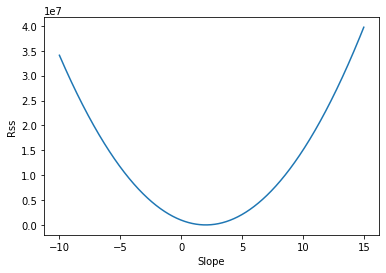

In [56]:
# Plot figure
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("Rss")

# remember, the goal is to find the value of slope, the value of the parameter that
# gives us the smallest value for RSS. And looking at the plot, it looks like it happens at around 2.

# 5.1.5: Simple Linear Regression in Code

In [60]:
import statsmodels.api as sm
model = sm.OLS(y, x)
estimates = model.fit() # this model has a slope but no intercept
print(estimates.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Sat, 15 Jan 2022   Prob (F-statistic):                    1.14e-75
Time:                        20:34:59   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [61]:
X = sm.add_constant(x) # use method add constant to add an intercept to the model
model2 = sm.OLS(y, X)
estimates2 = model2.fit() 
print(estimates2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           7.47e-82
Time:                        20:35:00   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

# 5.1.6: Multiple Linear Regression


In multiple linear regression,
the goal is to predict a quantitative or a scalar valued
response, Y, on the basis of several predictor variables.

If the values of the predictors are correlated,
it may not be possible to change the value of one predictor
and keep the others fixed.

So one therefore always needs to be careful with interpretation
of model results.

# 5.1.7: scikit-learn for Linear Regression

Scikit-learn depends on two other Python packages, NumPy and SciPy

In [77]:
n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1 
np.random.seed(1) # to obtain the same results
x_1 = 10 * ss.uniform.rvs(size=n) # we're generating x1 points, n of them,and they are uniformly distributed between 0 and 10
x_2 = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc = 0, scale = 1, size = n)
X = np.stack([x_1, x_2], axis = 1) # input consists of a list where we specify the vectors, or arrays, that we would like to stack.

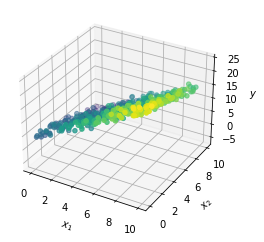

In [81]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$");


In [83]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [85]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept = True)
lm.fit(X,y)

LinearRegression()

In [86]:
lm.intercept_

5.154077763777256

In [89]:
lm.coef_[0]

1.9999378989891399

In [90]:
lm.coef_[1]

-1.0202644869933362

In [88]:
lm.coef_[:,]

array([ 1.9999379 , -1.02026449])

In [96]:
X_0 = np.array([2, 4]) # we put made up values of x1 = 2, x2 = 4 into an array X_0

In [97]:
lm.predict(X_0)

ValueError: Expected 2D array, got 1D array instead:
array=[2 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [98]:
lm.predict(X_0.reshape(1, -1))

array([5.07289561])

In [99]:
lm.score(X, y) # gives out the R square

0.9798997316600129

# 5.1.8: Assessing Model Accuracy

In the regression setting, the most commonly used measure
is the mean squared error, or MSE.

We can obtain estimates of test error by dividing our data set into two parts--
the training data and the test data.
And we use the training data only to train the model.
Once the model has been fitted, we can now
test its accuracy using the test data, which was not
in any way used to train the model.

In [100]:
from sklearn.model_selection import train_test_split
# This is the function that we'll be using to split a data set into training data and test data.

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 1) # xvar, yvar, proportion, randseed

In [102]:
lm = LinearRegression(fit_intercept = True)

In [103]:
lm.fit(X_train, y_train) # fit linear model using training data set

LinearRegression()

In [104]:
lm.score(X_test, y_test)

0.9794930834681773

When evaluating the performance of a model in a regression setting on test data, which measure is most appropriate?
Answer: Test MSE

When evaluating the performance of a model in a classification setting on test data, which measure is most appropriate?
Answer: Test error rate

How do we expect an model that was overfit on the training data to perform on testing data?
Answer: It will likely perform worse on the testing data.

What is the primary motivation for splitting our model into training and testing data?
Answer: By evaluating how our model fits on unseen data, we can see how generalizable it is.

